In [53]:
from keras.datasets import mnist
data = mnist.load_data()

In [54]:
(X_train, y_train), (X_test, y_test) = data

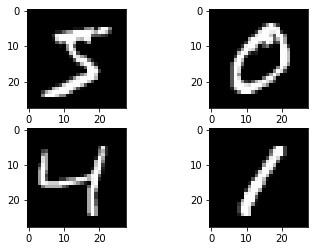

In [55]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [56]:
X_train[0].shape

(28, 28)

In [57]:
X_train.shape

(60000, 28, 28)

In [58]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

In [59]:
X_train = X_train / 255
X_test = X_test / 255

In [60]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [61]:
from keras.utils import np_utils
print(y_test.shape)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print( y_test.shape)

(10000,)
(10000, 10)


In [62]:
from keras.models import Sequential
from keras.layers import Dense

In [63]:
model = Sequential()

model.add(Dense(32, input_dim = 28*28, activation ='relu'))

model.add(Dense(64, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

In [64]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit(X_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.7617 - accuracy: 0.7818
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2191 - accuracy: 0.9357
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1651 - accuracy: 0.9510
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1369 - accuracy: 0.9595
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1194 - accuracy: 0.9637
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9684
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0934 - accuracy: 0.9714
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9750
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.9766
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0668 - accuracy: 0.9789

In [67]:
scores = model.evaluate(X_test, y_test)
print(scores)

313/313 [==============================] - 0s 987us/step - loss: 0.1035 - accuracy: 0.9695
[0.10345420986413956, 0.9695000052452087]
